# Import Lib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from geopy.distance import geodesic

# Load data

In [2]:
df = pd.read_csv('data.csv')

# ML

## make the df lighter

In [3]:
#df = df[['distance','weekday', 'hour', 'trip_duration']]

n = 10000
df_light = df.sample(n)
df_light = df_light.reset_index(drop=True)

## split

In [4]:
from sklearn.model_selection import train_test_split

X = df_light.drop('trip_duration', axis=1)
y = df_light['trip_duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

## preprocessing

In [5]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_validate

def crossVal_model(preprocessor, estimator, X_train, y_train):
    
    #model
    model = make_pipeline(preprocessor, estimator)
    
    #cross validation
    scr = cross_validate(model, X_train, y_train, cv=10, scoring=['r2', 'neg_root_mean_squared_error'])
    
    #metrics
    print("r2 = {:.0%}".format(scr['test_r2'].mean()))
    print("rmse = {:.0f}".format(scr['test_neg_root_mean_squared_error'].mean()))
    
    return model, scr

def explore_features(numerical_features, categorical_features, estimator, X_train, y_train):

    numerical_pipeline = make_pipeline(SimpleImputer(), StandardScaler())
    categorical_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), 
                                         OneHotEncoder(handle_unknown = "ignore"))

    preprocessor = make_column_transformer((numerical_pipeline, numerical_features), 
                                           (categorical_pipeline, categorical_features))
    
    model = crossVal_model(preprocessor, estimator, X_train, y_train)
    
    return model

def plot_sim_vs_obs(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    sim = list(y_pred)
    obs = list(y_test)

    plt.figure(figsize=(5,5))
    lim_max= 4000
    lim_min = 0
    plt.scatter(sim, obs)
    plt.xlim(lim_min,lim_max)
    plt.ylim(lim_min,lim_max)
    
    a = [lim_min, lim_max]
    b = [lim_min, lim_max]
    plt.plot(a, b, 'r-')
    plt.show()
    
    for i in range(10):
        print(f'obs : {obs[i]} \t| sim : {round(sim[i])}')

## Exploration

### Linear regressor

r2 = 63%
rmse = -392


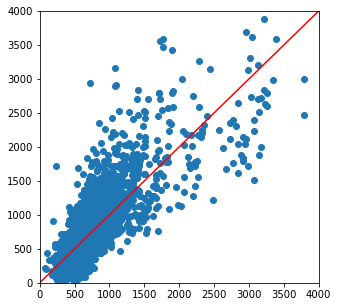

obs : 982 	| sim : 976
obs : 200 	| sim : 547
obs : 1938 	| sim : 1694
obs : 1022 	| sim : 697
obs : 357 	| sim : 359
obs : 1089 	| sim : 881
obs : 668 	| sim : 768
obs : 1190 	| sim : 917
obs : 634 	| sim : 600
obs : 1202 	| sim : 1002


In [6]:
from sklearn.linear_model import LinearRegression

numerical_feture = ['distance']
categorical_feature = ['weekday', 'hour']

estimator = LinearRegression()
model, score = explore_features(numerical_feture, categorical_feature, estimator, X_train, y_train);
plot_sim_vs_obs(model, X_train, X_test, y_train, y_test)

### Dimension reduction

r2 = 63%
rmse = -390


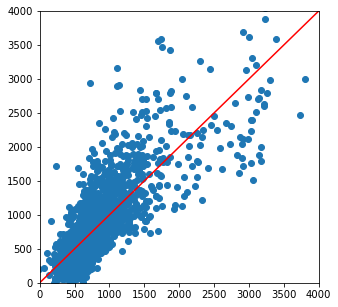

obs : 982 	| sim : 1015
obs : 200 	| sim : 547
obs : 1938 	| sim : 1672
obs : 1022 	| sim : 691
obs : 357 	| sim : 344
obs : 1089 	| sim : 868
obs : 668 	| sim : 776
obs : 1190 	| sim : 935
obs : 634 	| sim : 585
obs : 1202 	| sim : 1039


In [7]:
from sklearn.decomposition import PCA

#preprocessing
numerical_features = ['distance']
categorical_features = ['weekday', 'hour']
pca_pickup = ['pickup_longitude', 'pickup_latitude']
pca_dropoff = ['dropoff_longitude', 'dropoff_latitude']

numerical_pipeline = make_pipeline(SimpleImputer(), RobustScaler())
categorical_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), 
                                     OneHotEncoder(handle_unknown = "ignore"))
pickup_pipeline = make_pipeline(RobustScaler(),
                               PCA(n_components=1))

preprocessor = make_column_transformer((numerical_pipeline, numerical_features), 
                                       (categorical_pipeline, categorical_features),
                                       (pickup_pipeline, pca_pickup),
                                      (pickup_pipeline, pca_dropoff))

model, score = crossVal_model(preprocessor, estimator, X_train, y_train)

plot_sim_vs_obs(model, X_train, X_test, y_train, y_test)

r2 = 63%
rmse = -390


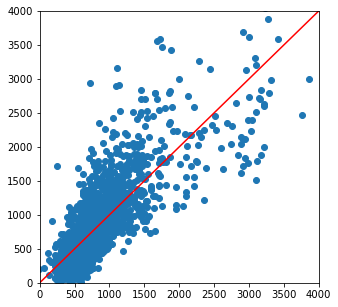

obs : 982 	| sim : 1031
obs : 200 	| sim : 556
obs : 1938 	| sim : 1649
obs : 1022 	| sim : 686
obs : 357 	| sim : 346
obs : 1089 	| sim : 866
obs : 668 	| sim : 781
obs : 1190 	| sim : 939
obs : 634 	| sim : 582
obs : 1202 	| sim : 1038


In [8]:
#preprocessing
numerical_features = ['distance']
categorical_features = ['weekday', 'hour']
pca_loc = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']

numerical_pipeline = make_pipeline(SimpleImputer(), RobustScaler())
categorical_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), 
                                     OneHotEncoder(handle_unknown = "ignore"))
loc_pipeline = make_pipeline(RobustScaler(),
                               PCA(n_components=3))

preprocessor = make_column_transformer((numerical_pipeline, numerical_features), 
                                       (categorical_pipeline, categorical_features),
                                       (loc_pipeline, pca_loc))

model, score = crossVal_model(preprocessor, estimator, X_train, y_train)

plot_sim_vs_obs(model, X_train, X_test, y_train, y_test)

### ensemble

r2 = 63%
rmse = -390


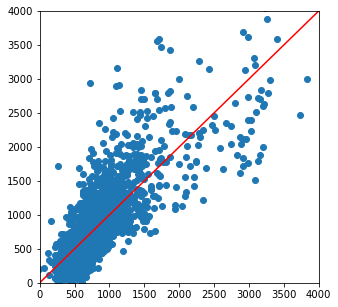

obs : 982 	| sim : 1032
obs : 200 	| sim : 553
obs : 1938 	| sim : 1649
obs : 1022 	| sim : 684
obs : 357 	| sim : 347
obs : 1089 	| sim : 862
obs : 668 	| sim : 779
obs : 1190 	| sim : 935
obs : 634 	| sim : 587
obs : 1202 	| sim : 1038


In [9]:
from sklearn.ensemble import BaggingRegressor

#estimator : Bagging
estimator = BaggingRegressor(base_estimator=LinearRegression(),
                            n_estimators=100)

#preprocessing
numerical_features = ['distance']
categorical_features = ['weekday', 'hour']
pca_loc = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']

numerical_pipeline = make_pipeline(SimpleImputer(), RobustScaler())
categorical_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), 
                                     OneHotEncoder(handle_unknown = "ignore"))
loc_pipeline = make_pipeline(RobustScaler(),
                               PCA(n_components=3))

preprocessor = make_column_transformer((numerical_pipeline, numerical_features), 
                                       (categorical_pipeline, categorical_features),
                                       (loc_pipeline, pca_loc))

model, score = crossVal_model(preprocessor, estimator, X_train, y_train)

plot_sim_vs_obs(model, X_train, X_test, y_train, y_test)

r2 = 63%
rmse = -392


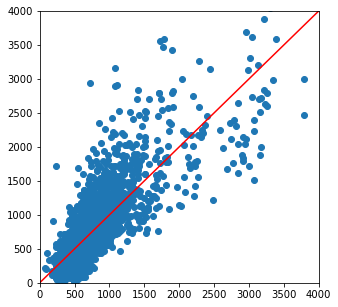

obs : 982 	| sim : 977
obs : 200 	| sim : 546
obs : 1938 	| sim : 1689
obs : 1022 	| sim : 697
obs : 357 	| sim : 360
obs : 1089 	| sim : 877
obs : 668 	| sim : 766
obs : 1190 	| sim : 914
obs : 634 	| sim : 605
obs : 1202 	| sim : 1002


In [10]:
#si on compare avec un simple linear regressor

#estimator : Bagging
estimator = BaggingRegressor(base_estimator=LinearRegression(),
                            n_estimators=100)

numerical_feture = ['distance']
categorical_feature = ['weekday', 'hour']

model, score = explore_features(numerical_feture, categorical_feature, estimator, X_train, y_train);
plot_sim_vs_obs(model, X_train, X_test, y_train, y_test)

r2 = 63%
rmse = -392


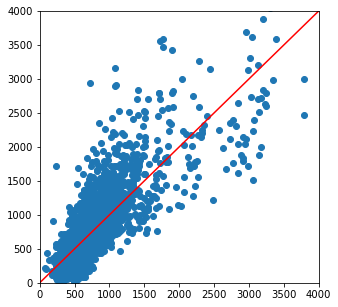

obs : 982 	| sim : 975
obs : 200 	| sim : 546
obs : 1938 	| sim : 1694
obs : 1022 	| sim : 698
obs : 357 	| sim : 358
obs : 1089 	| sim : 880
obs : 668 	| sim : 767
obs : 1190 	| sim : 917
obs : 634 	| sim : 600
obs : 1202 	| sim : 1001


In [12]:
#si on compare avec un simple linear regressor

#estimator : Bagging
estimator = BaggingRegressor(base_estimator=LinearRegression(),
                            n_estimators=500)

numerical_feture = ['distance']
categorical_feature = ['weekday', 'hour']

model, score = explore_features(numerical_feture, categorical_feature, estimator, X_train, y_train);
plot_sim_vs_obs(model, X_train, X_test, y_train, y_test)

r2 = 68%
rmse = -363


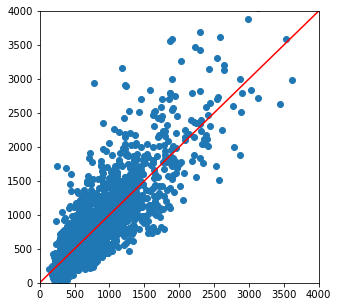

obs : 982 	| sim : 1116
obs : 200 	| sim : 367
obs : 1938 	| sim : 1792
obs : 1022 	| sim : 568
obs : 357 	| sim : 312
obs : 1089 	| sim : 841
obs : 668 	| sim : 866
obs : 1190 	| sim : 898
obs : 634 	| sim : 569
obs : 1202 	| sim : 1215


In [14]:
from sklearn.ensemble import GradientBoostingRegressor

estimator = GradientBoostingRegressor(n_estimators=100)
    
numerical_feture = ['distance']
categorical_feature = ['weekday', 'hour']

model, score = explore_features(numerical_feture, categorical_feature, estimator, X_train, y_train);
plot_sim_vs_obs(model, X_train, X_test, y_train, y_test)

r2 = 69%
rmse = -359


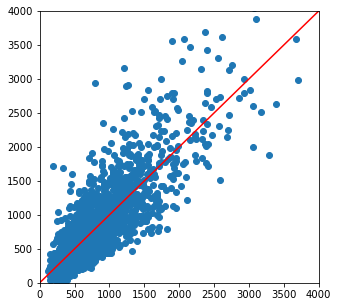

obs : 982 	| sim : 1103
obs : 200 	| sim : 357
obs : 1938 	| sim : 1756
obs : 1022 	| sim : 569
obs : 357 	| sim : 281
obs : 1089 	| sim : 851
obs : 668 	| sim : 873
obs : 1190 	| sim : 891
obs : 634 	| sim : 565
obs : 1202 	| sim : 1188


In [20]:
estimator = GradientBoostingRegressor(n_estimators=100,
                                     learning_rate=0.15)
    
numerical_feture = ['distance']
categorical_feature = ['weekday', 'hour']

model, score = explore_features(numerical_feture, categorical_feature, estimator, X_train, y_train);
plot_sim_vs_obs(model, X_train, X_test, y_train, y_test)

r2 = 70%
rmse = -351


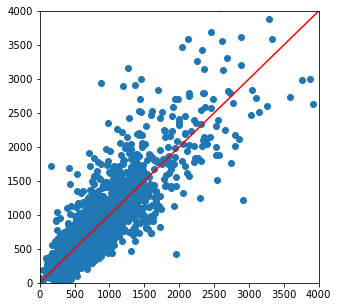

obs : 982 	| sim : 1149
obs : 200 	| sim : 376
obs : 1938 	| sim : 2114
obs : 1022 	| sim : 625
obs : 357 	| sim : 353
obs : 1089 	| sim : 818
obs : 668 	| sim : 906
obs : 1190 	| sim : 1002
obs : 634 	| sim : 469
obs : 1202 	| sim : 1205


In [26]:
#preprocessing
numerical_features = ['distance']
categorical_features = ['weekday', 'hour']
pca_loc = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']

numerical_pipeline = make_pipeline(SimpleImputer(), RobustScaler())
categorical_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), 
                                     OneHotEncoder(handle_unknown = "ignore"))
loc_pipeline = make_pipeline(RobustScaler(),
                               PCA(n_components=3))

preprocessor = make_column_transformer((numerical_pipeline, numerical_features), 
                                       (categorical_pipeline, categorical_features),
                                       (loc_pipeline, pca_loc))

estimator = GradientBoostingRegressor(n_estimators=200,
                                     learning_rate=0.15)

model, score = crossVal_model(preprocessor, estimator, X_train, y_train)

plot_sim_vs_obs(model, X_train, X_test, y_train, y_test)

r2 = 69%
rmse = -359


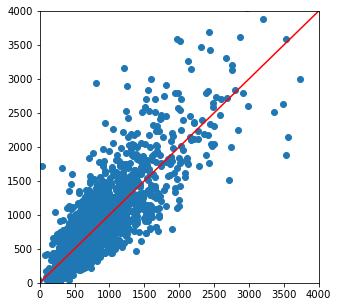

obs : 982 	| sim : 1073
obs : 200 	| sim : 340
obs : 1938 	| sim : 1676
obs : 1022 	| sim : 550
obs : 357 	| sim : 293
obs : 1089 	| sim : 875
obs : 668 	| sim : 852
obs : 1190 	| sim : 877
obs : 634 	| sim : 562
obs : 1202 	| sim : 1191


In [24]:
estimator = GradientBoostingRegressor(n_estimators=200,
                                     learning_rate=0.15)
    
numerical_feture = ['distance']
categorical_feature = ['weekday', 'hour']

model, score = explore_features(numerical_feture, categorical_feature, estimator, X_train, y_train);
plot_sim_vs_obs(model, X_train, X_test, y_train, y_test)

### random Forest

r2 = 63%
rmse = -390


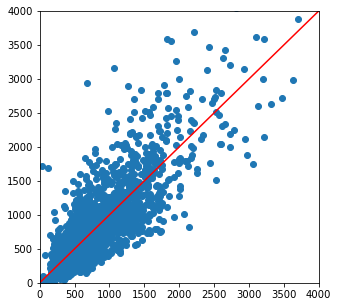

obs : 982 	| sim : 1007
obs : 200 	| sim : 453
obs : 1938 	| sim : 1622
obs : 1022 	| sim : 433
obs : 357 	| sim : 287
obs : 1089 	| sim : 822
obs : 668 	| sim : 792
obs : 1190 	| sim : 1001
obs : 634 	| sim : 549
obs : 1202 	| sim : 1072


In [25]:
from sklearn.ensemble import RandomForestRegressor

estimator = RandomForestRegressor(n_estimators=100)
    
numerical_feture = ['distance']
categorical_feature = ['weekday', 'hour']

model, score = explore_features(numerical_feture, categorical_feature, estimator, X_train, y_train);
plot_sim_vs_obs(model, X_train, X_test, y_train, y_test)

# BEST MODEL

r2 = 70%
rmse = -351


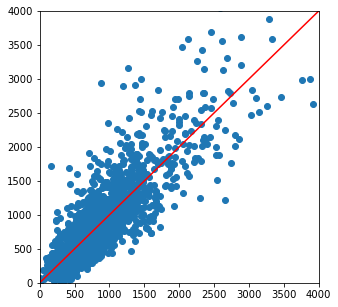

obs : 982 	| sim : 1149
obs : 200 	| sim : 376
obs : 1938 	| sim : 2114
obs : 1022 	| sim : 625
obs : 357 	| sim : 353
obs : 1089 	| sim : 818
obs : 668 	| sim : 906
obs : 1190 	| sim : 1002
obs : 634 	| sim : 469
obs : 1202 	| sim : 1205


In [27]:
#preprocessing
numerical_features = ['distance']
categorical_features = ['weekday', 'hour']
pca_loc = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']

numerical_pipeline = make_pipeline(SimpleImputer(), RobustScaler())
categorical_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), 
                                     OneHotEncoder(handle_unknown = "ignore"))
loc_pipeline = make_pipeline(RobustScaler(),
                               PCA(n_components=3))

preprocessor = make_column_transformer((numerical_pipeline, numerical_features), 
                                       (categorical_pipeline, categorical_features),
                                       (loc_pipeline, pca_loc))

estimator = GradientBoostingRegressor(n_estimators=200,
                                     learning_rate=0.15)

model, score = crossVal_model(preprocessor, estimator, X_train, y_train)

plot_sim_vs_obs(model, X_train, X_test, y_train, y_test)

# Train over 100 000

In [28]:
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['distance']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                            

In [29]:
n = 100000
df_light = df.sample(n)
df_light = df_light.reset_index(drop=True)

X = df_light.drop('trip_duration', axis=1)
y = df_light['trip_duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=5)

model.fit(X_train, y_train)
print("{} ; score = {:.2%}".format(model.__class__.__name__, model.score(X_test, y_test)))

Pipeline ; 71.62%


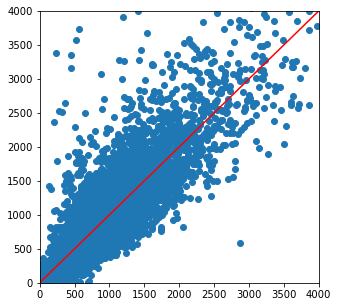

obs : 698 	| sim : 560
obs : 1175 	| sim : 1568
obs : 174 	| sim : 115
obs : 111 	| sim : 302
obs : 608 	| sim : 750
obs : 336 	| sim : 394
obs : 1070 	| sim : 1417
obs : 1809 	| sim : 1592
obs : 300 	| sim : 295
obs : 793 	| sim : 504


In [30]:
plot_sim_vs_obs(model, X_train, X_test, y_train, y_test)